In [3]:
import random
import json
from math import floor, sqrt
import pandas as pd
import numpy as np
import functools
from IPython.core.display import HTML


from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec

import hdbscan
from sklearn.cluster import KMeans
# SpectralClustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from sklearn.decomposition import TruncatedSVD

In [4]:
def split_train_test(doc_split=10000):
    """
    Loads data, splits into train and test set.
    Returns
    ----------
    train_labels: List[str]
    train_text: List[str]
    test_labels: List[str]
    test_text: List[str]
    """
    df = pd.read_csv('keywords_with_clean_txt.csv')
    df = df.dropna(subset='clean_text')
    # shuffle rows in dataframe
    df = df.sample(frac=1).reset_index(drop=True)
    df_train =df.loc[:doc_split, :]
    df_test = df.loc[doc_split:, :]
    # dataset is evenly distributed, hopefully fine split.
    train_labels = df_train.copy()["doc_path"].astype(str).to_list()
    train_text = df_train.copy()["clean_text"].astype(str).to_list()
    test_labels = df_test.copy()["doc_path"].astype(str).to_list()
    test_text = df_test.copy()["clean_text"].astype(str).to_list()
    return train_labels, train_text, test_labels, test_text

In [5]:
y_train, X_train, y_test, X_test = split_train_test()

In [6]:
TFIDF_VEC = TfidfVectorizer(input='content', max_df=0.90)
X_train = TFIDF_VEC.fit_transform(X_train)
SVD = TruncatedSVD(n_components=2)
X_reduced_dimensions = SVD.fit_transform(X_train)

In [7]:
SVD.explained_variance_ratio_

array([0.00179697, 0.00261671])

In [8]:
SVD.explained_variance_ratio_.sum()

0.004413675098373588

In [29]:
def print_top_svd_features(svd_component_index, num_words=20):
    feature_names = TFIDF_VEC.get_feature_names()
    best_features = [feature_names[i] for i in SVD.components_[svd_component_index].argsort()][::-1]
    return best_features[:num_words]

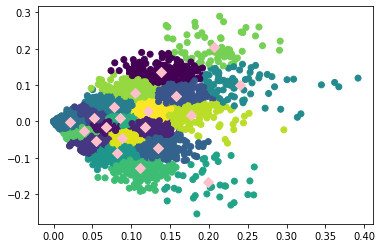

In [9]:

model = KMeans(n_clusters=20).fit(X_reduced_dimensions)
cluster_labels = model.predict(X_reduced_dimensions)
fig, axes = plt.subplots(nrows=1, ncols=1)
#flat_axes = axes.flatten()
name = "tab20b"
cmap = get_cmap(name)  # type: matplotlib.colors.ListedColormap
colors = cmap.colors  # type: list
for i in range(0, 1):
    #flat_axes[i].set_prop_cycle(color=colors)
    axes.scatter(X_reduced_dimensions[:, i], X_reduced_dimensions[:, i+1], c=cluster_labels)
centroids = model.cluster_centers_
centroid_x = centroids[:, 0]
centroid_y = centroids[:, 1]
axes.scatter(centroid_x, centroid_y, marker='D', s=50, color='pink')
plt.show()

Text(0, 0.5, 'Euclidean distance')

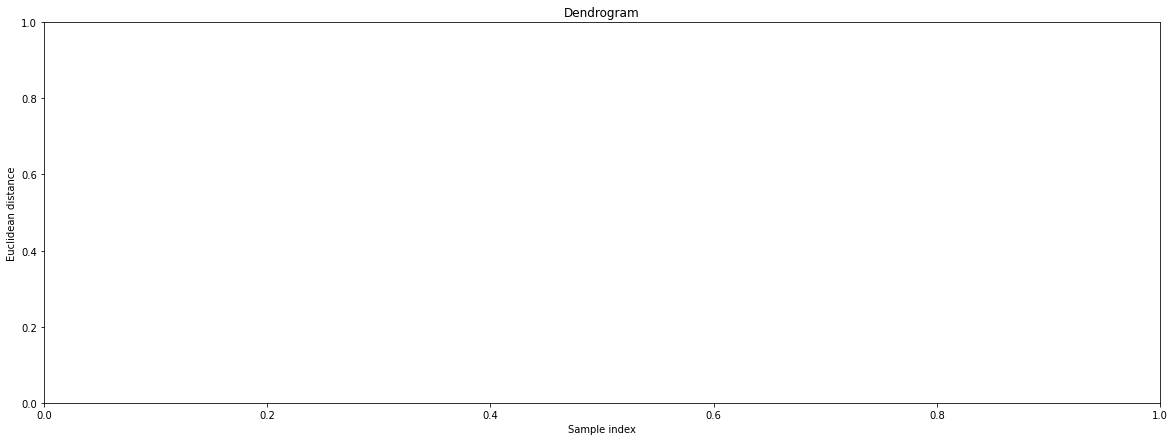

In [10]:
import scipy.cluster.hierarchy as sc

# Plot dendrogram
plt.figure(figsize=(20, 7))  
plt.title("Dendrograms")  

# Create dendrogram
clusters = sc.linkage(X_reduced_dimensions, method='ward')
a = sc.to_tree(clusters , rd=False)

plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distance')

In [25]:
plt.show()

19998


In [ ]:
# a represents a tree object. we can retrieve a path for a node using a recursive function....
a.get_count()
a.get_id()
print(a.get_right().get_right().get_id())

https://stackoverflow.com/questions/19964266/scipy-dendrogram-to-json-for-d3-js-tree-visualisation

In [16]:
# Create a nested dictionary from the ClusterNode's returned by SciPy
def add_node(node, parent):
    # First create the new node and append it to its parent's children
    newNode = dict( node_id=node.id, children=[] )
    parent["children"].append( newNode )

    # Recursively add the current node's children
    if node.left: 
        add_node( node.left, newNode )
        
    if node.right: 
        add_node( node.right, newNode )

In [27]:
d3Dendro = dict(children=[], name="Root1")
add_node(a, d3Dendro)
id2name = dict(zip(range(len(y_train)), ['_'.join(doc_path.split('/')[-2:]) for doc_path in y_train]))
print(id2name)

4328
4214
191
17760
1747
16995
3100
19228
8426
4560
3181
18791
4723
14742
2713
30
17031
578
11212
8529
19612
8460
1261
17937
2640
13568
1160
18541
3971
16255
5300
610
18596
9243
2060
17561
7249
12116
3690
15033
5818
19779
2491
16686
4490
19001
2152
14953
4507
14450
5035
1797
18057
6249
982
912
15883
5988
13362
776
17753
4557
16488
3720
5898
19553
3983
7813
17300
9873
1434
15202
1365
1527
1130
18918
2509
15183
2345
6603
17928
9364
2638
19497
3060
14249
2930
17123
3177
18266
1159
12263
9809
714
18118
490
14652
5264
4854
17608
2981
15473
3723
747
19899
63
16528
2012
13359
2339
18019
2016
7216
2280
16391
8010
4245
9518
951
19262
1203
16468
9339
4198
14651
9120
3329
18532
3216
12985
1909
3129
18052
786
16265
8175
1954
15405
9829
1586
19600
3754
9361
8233
18465
3576
444
17602
2428
14015
1679
18987
9171
5806
6115
18444
990
15176
1440
19561
4478
13663
6510
17026
3643
16679
1940
5842
19108
4533
5716
18310
3126
2603
7
12825
2368
19949
5497
11162
2354
15492
8904
7418
4720
18334
3091
11987
3488
18

2370
14766
6689
14674
4630
1202
18200
2945
12842
4053
12645
5139
16040
1000
2485
14290
4616
4110
3522
19295
3725
859
12070
53
15275
9919
7282
138
13390
797
17251
3038
1259
15852
4575
13013
9217
1549
18977
1901
6806
15786
1646
13204
9652
1687
474
18126
8222
4656
4957
2496
15041
5072
15916
5347
11167
5925
1785
11121
6186
19916
7818
2968
13703
2461
10660
4558
17105
1548
434
13890
3830
1075
4308
16378
7517
2478
8454
513
18460
6901
2047
14655
7420
13041
3928
218
16984
808
12662
3636
13898
316
11496
5903
10346
7568
19238
3036
6347
2310
16536
5668
3843
11061
4842
1973
14784
2075
1138
13453
3773
18609
5317
14437
8544
10799
4824
12936
131
17137
8440
355
15063
1056
5977
12137
8855
3222
19639
6215
4726
3903
14871
5116
4754
8577
13001
2362
8549
17431
4581
10530
76
16188
4761
1685
9541
18223
1922
14814
128
13330
4918
227
17351
1154
13587
2729
5458
1965
19419
1898
13461
4756
10561
1189
16374
3123
12834
2500
2253
18415
1800
11054
114
15669
3876
13099
6470
229
17369
8177
12055
1654
10886
2880
3304
168

3338
524
15682
1513
18136
8033
1405
16376
216
14796
4945
18289
4074
14731
537
2636
10617
202
13468
3934
17241
984
13860
3008
3455
4222
19470
5336
2896
1980
17740
5910
921
18473
2986
5
719
16035
5994
14363
1762
12676
1705
18108
2651
12009
956
12669
6187
4763
17408
4544
6474
5030
13305
2723
16249
543
10170
4551
1258
19115
604
14876
2875
17028
5783
13761
5541
1445
18583
5148
6293
11137
1649
6304
16800
547
11910
1948
11728
3613
16325
6169
357
14535
7881
19884
4277
14418
139
6099
11876
1753
17112
3975
13400
4235
11475
892
17393
5659
2488
13269
7021
16277
170
10002
3264
14395
7678
11992
2420
10397
2577
18988
9355
6164
10787
7999
2203
14379
1697
11550
5181
6448
13843
2269
4318
17659
6937
8589
13636
3213
10160
789
50
16692
1839
3275
12575
8137
9404
5101
12200
5919
10223
858
2403
19562
2747
7581
1979
12973
4238
16160
7601
841
12775
9532
575
14865
3693
9106
2913
18339
1430
12017
3474
2721
15860
2816
11363
143
10976
1412
4065
17974
484
12650
1542
7417
6111
7386
16385
6573
3669
12238
9460
4694
115

1347
19203
1366
10912
829
16117
6377
11414
2867
5746
3991
13794
376
18229
3761
616
2176
9634
14680
7072
1112
12268
8336
4902
17297
7834
12086
6419
15620
6335
11396
9236
203
14260
2319
19835
1652
7193
14448
2303
3611
17670
1831
15983
7878
18701
2132
14589
6238
4974
527
17457
4681
2832
19261
4826
1663
16452
427
14310
317
1681
18320
6124
8383
737
15721
8699
4909
12480
220
18259
5085
4713
911
14676
3982
16889
774
11200
8089
19613
1249
1336
16186
6764
391
18681
8923
4623
15101
1064
5512
17951
5360
6318
17638
257
4248
19525
351
3017
15100
2624
7055
2840
17726
1752
7851
13179
3362
10420
478
17605
1658
181
15380
2523
12790
2584
19082
1927
13962
4023
4832
15927
743
487
11645
6826
4624
18006
1200
1608
14649
2846
5354
17557
1215
940
12576
5246
3719
16857
7863
14
15546
8047
6710
1541
13402
13
19668
2439
14266
540
12496
4801
3525
17511
7870
252
14158
2898
19097
2671
15979
4686
11509
6290
6547
3114
17979
4409
11471
4070
14354
671
2544
18744
1474
11297
462
15508
6814
12539
4170
13072
1978
18122
7671


In [15]:
# Label each node with the names of each leaf in its subtree
def label_tree( n ):
    # If the node is a leaf, then we have its name
    if len(n["children"]) == 0:
        leafNames = [ id2name[n["node_id"]] ]

    # If not, flatten all the leaves in the node's subtree
    else:
        leafNames = functools.reduce(lambda ls, c: ls + label_tree(c),
                                     n["children"], [])

    # Delete the node id since we don't need it anymore and
    # it makes for cleaner JSON
    del n["node_id"]

    # Labeling convention: "-"-separated leaf names
    n["name"] = name = "-".join(sorted(map(str, leafNames)))

    return leafNames

In [16]:
label_tree( d3Dendro["children"][0] )

['alt.atheism_53805.txt',
 'talk.religion.misc_84128.txt',
 'soc.religion.christian_20847.txt',
 'talk.religion.misc_84195.txt',
 'talk.religion.misc_84138.txt',
 'alt.atheism_51172.txt',
 'soc.religion.christian_20765.txt',
 'soc.religion.christian_20798.txt',
 'soc.religion.christian_20547.txt',
 'soc.religion.christian_20695.txt',
 'talk.religion.misc_83658.txt',
 'soc.religion.christian_20732.txt',
 'alt.atheism_53086.txt',
 'soc.religion.christian_21599.txt',
 'talk.religion.misc_83902.txt',
 'talk.religion.misc_84142.txt',
 'soc.religion.christian_20857.txt',
 'soc.religion.christian_21550.txt',
 'soc.religion.christian_21465.txt',
 'talk.religion.misc_84182.txt',
 'soc.religion.christian_20722.txt',
 'soc.religion.christian_21765.txt',
 'talk.religion.misc_84043.txt',
 'soc.religion.christian_20551.txt',
 'talk.religion.misc_83547.txt',
 'alt.atheism_53066.txt',
 'soc.religion.christian_20879.txt',
 'soc.religion.christian_20554.txt',
 'soc.religion.christian_21748.txt',
 'talk.

In [22]:
for value, dic in d3Dendro['children'][0].items():
    print(value)
    print(dic)
    

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=15).fit(X_reduced_dimensions)
labels = hdbscan_model.labels_
print(np.unique(labels))

In [ ]:
d3Dendro
json.dump(d3Dendro, open("d3-dendrogram.json", "w"), sort_keys=True, indent=4)

In [ ]:
print(len(d3Dendro.keys()))

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1)
#flat_axes = axes.flatten()
name = "tab20b"
cmap = get_cmap(name)  # type: matplotlib.colors.ListedColormap
colors = cmap.colors  # type: list
for i in range(0, 1):
    #flat_axes[i].set_prop_cycle(color=colors)
    axes.scatter(X_reduced_dimensions[:, i], X_reduced_dimensions[:, i+1], c=labels)
plt.show()